In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [3]:
path = "MicrodadosParaDecisionTree.csv"

dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

## Separador dos dados em conjunto de teste/treino

In [4]:
np.random.seed(43267)

df = dadosEnem[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]

df = df[(df != 0).all(1)]

var_adivinhar = 'NU_NOTA_MT';
y_adivinhar = dadosEnem['NU_NOTA_MT']


#Removendo as variaveis de notas da dataFrame
x_variaveis = dadosEnem
x_variaveis =  x_variaveis.loc[:, dadosEnem.columns != 'NU_NOTA_CN']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_LC']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_MT']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_REDACAO']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_CH']


#x_variaveis = df[['NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]


#y_adivinhar

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_variaveis, y_adivinhar)






## Prevendo notas de matemática

### Algoritmo de Previsão Burro

In [5]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

12288.032451893112

### Algoritmo Decision Tree Regressor

In [6]:
modelo = DecisionTreeRegressor(max_depth=8)
modelo.fit(x_treino, y_treino)
predicoes_notas_lc = modelo.predict(x_teste)

print(mean_squared_error(y_teste, predicoes_notas_lc))



7776.32844259161


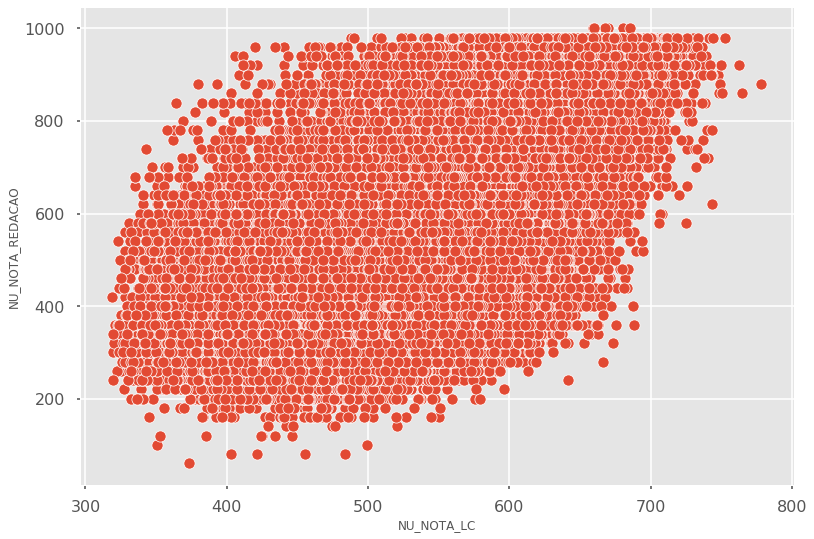

In [7]:
#sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=predicoes_notas_lc)
#sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=y_teste.values)

df = dadosEnem[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]

df = df[(df != 0).all(1)]

sns.scatterplot(x="NU_NOTA_LC", y="NU_NOTA_REDACAO",data=df)


## Usando algoritmo de mineração de regras de associação

In [8]:
##Depois fazer tratamento diferente
path = "MicrodadosParaDecisionTree.csv"dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

In [9]:
df = dadosEnem
df = dadosEnem.drop(['QuartoPessoas'], axis=1)
df = dadosEnem.drop(['MediaEstudoPais'], axis=1) 
df = dadosEnem.drop(['NU_IDADE'], axis=1)


x_variaveis = df
x_variaveis =  x_variaveis.loc[:, df.columns != 'NU_NOTA_CN']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_LC']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_MT']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_REDACAO']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_CH']






In [10]:
from sklearn.preprocessing import LabelBinarizer

#y = LabelBinarizer().fit_transform(x_variaveis.TP_COR_RACA)

raca = pd.get_dummies(x_variaveis.TP_COR_RACA, prefix='RACA')

sexo = pd.get_dummies(x_variaveis.TP_SEXO, prefix='SEXO')
dependencia_esc = pd.get_dummies(x_variaveis.TP_DEPENDENCIA_ADM_ESC, prefix='dependencia_esc')
localizacao_esc = pd.get_dummies(x_variaveis.TP_LOCALIZACAO_ESC, prefix='localizacao_esc')
lingua = pd.get_dummies(x_variaveis.TP_LINGUA, prefix='lingua')
q003 = pd.get_dummies(x_variaveis.Q003, prefix='q003')
q004 = pd.get_dummies(x_variaveis.Q004, prefix='q004')
q006 = pd.get_dummies(x_variaveis.Q006, prefix='q006')
q022 = pd.get_dummies(x_variaveis.Q022, prefix='q022')
q024 = pd.get_dummies(x_variaveis.Q024, prefix='q024')
q025 = pd.get_dummies(x_variaveis.Q025, prefix='q025')

dataEncoded = pd.pandas.concat([raca, sexo,dependencia_esc,localizacao_esc,lingua,q003,q004,q006,q022,q024,q025,dadosEnem['QuartoPessoas'],dadosEnem['MediaEstudoPais'],dadosEnem['NU_IDADE']],axis=1)




In [11]:
# Substituindo de acordo com os valores no dicionário
raca.RACA_0.replace(1,"Não_Declarado",inplace=True)
raca.RACA_1.replace(1,"Branca",inplace=True)
raca.RACA_2.replace(1,"Preta",inplace=True)
raca.RACA_3.replace(1,"Parda",inplace=True)
raca.RACA_4.replace(1,"Amarela",inplace=True)
raca.RACA_5.replace(1,"Indígena",inplace=True)



In [12]:
sexo['SEXO_0'].replace(1,"Masculino",inplace=True)
sexo['SEXO_1'].replace(1,"Feminino",inplace=True)

In [13]:
dependencia_esc['dependencia_esc_1.0'].replace(1,"Federal",inplace=True)
dependencia_esc['dependencia_esc_2.0'].replace(1,"Estadual",inplace=True)
dependencia_esc['dependencia_esc_3.0'].replace(1,"Municipal",inplace=True)
dependencia_esc['dependencia_esc_4.0'].replace(1,"Privada",inplace=True)

In [14]:
localizacao_esc['localizacao_esc_1.0'].replace(1,"Urbana",inplace=True)
localizacao_esc['localizacao_esc_2.0'].replace(1,"Rural",inplace=True)


In [15]:
lingua['lingua_0'].replace(1,"Ingles",inplace=True)
lingua['lingua_1'].replace(1,"Espanhol",inplace=True)

In [16]:
q003['q003_0'].replace(1,"Profissao_Pai_Grupo_1",inplace=True)
q003['q003_1'].replace(1,"Profissao_Pai_Grupo_2",inplace=True)
q003['q003_2'].replace(1,"Profissao_Pai_Grupo_3",inplace=True)

In [17]:
q004['q004_0'].replace(1,"Profissao_Mae_Grupo_1",inplace=True)
q004['q004_1'].replace(1,"Profissao_Mae_Grupo_2",inplace=True)
q004['q004_2'].replace(1,"Profissao_Mae_Grupo_3",inplace=True)

In [18]:
q006['q006_1'].replace(1,"Grupo_Renda_1",inplace=True)
q006['q006_2'].replace(1,"Grupo_Renda_2",inplace=True)
q006['q006_3'].replace(1,"Grupo_Renda_2",inplace=True)

In [19]:
q022['q022_0'].replace(1,"Nao_Tem_Celular_Casa",inplace=True)
q022['q022_1'].replace(1,"Tem_Celular_Casa",inplace=True)

In [20]:
q024['q024_0'].replace(1,"Nao_Tem_Computador_Casa",inplace=True)
q024['q024_1'].replace(1,"Tem_Computador_Casa",inplace=True)

In [21]:
q025['q025_0'].replace(1,"Nao_Tem_Internet_Casa",inplace=True)
q025['q025_1'].replace(1,"Tem_Internet_Casa",inplace=True)

In [22]:
#para rodas os algoritmos vai ser necessario passar pelas colunas para criar a tabela de itens

encoded_values = pd.pandas.concat([raca, sexo,dependencia_esc,localizacao_esc,q003,q004,q006,q022,q024,q025], axis=1)

encoded_values


,RACA_0,RACA_1,RACA_2,RACA_3,RACA_4,RACA_5,SEXO_0,SEXO_1,dependencia_esc_1.0,dependencia_esc_2.0,...,q004_2,q006_1,q006_2,q006_3,q022_0,q022_1,q024_0,q024_1,q025_0,q025_1
0,0,0,0,Parda,0,0,0,Feminino,0,Estadual,...,Profissao_Mae_Grupo_3,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,0,Tem_Internet_Casa
1,0,0,0,Parda,0,0,0,Feminino,0,Estadual,...,0,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,0,Tem_Internet_Casa
2,0,Branca,0,0,0,0,0,Feminino,0,Estadual,...,Profissao_Mae_Grupo_3,0,Grupo_Renda_2,0,0,Tem_Celular_Casa,0,Tem_Computador_Casa,0,Tem_Internet_Casa
3,0,Branca,0,0,0,0,0,Feminino,0,Estadual,...,0,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,Nao_Tem_Internet_Casa,0
4,0,Branca,0,0,0,0,Masculino,0,0,0,...,0,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,0,Tem_Internet_Casa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107620,0,Branca,0,0,0,0,Masculino,0,0,Estadual,...,0,0,Grupo_Renda_2,0,0,Tem_Celular_Casa,0,Tem_Computador_Casa,0,Tem_Internet_Casa
107621,0,0,0,Parda,0,0,0,Feminino,0,Estadual,...,0,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,Nao_Tem_Internet_Casa,0
107622,0,0,Preta,0,0,0,Masculino,0,0,Estadual,...,Profissao_Mae_Grupo_3,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,Nao_Tem_Internet_Casa,0
107623,0,Branca,0,0,0,0,0,Feminino,0,Estadual,...,0,Grupo_Renda_1,0,0,0,Tem_Celular_Casa,Nao_Tem_Computador_Casa,0,0,Tem_Internet_Casa


In [23]:
encoded_values.to_csv("dadosEnemParaAssociacao.csv",sep=";")


In [48]:
records = []
for i in range(0,encoded_values.shape[0]):
    records.append([str(encoded_values.values[i,j]) for j in range(0, encoded_values.shape[1] )])

In [49]:
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]



In [50]:
newRecords = []
for record in records:
    record = remove_values_from_list(record,"0")
    newRecords.append(record)

In [51]:
dadosParaMineracao = pd.DataFrame(newRecords);
#dadosParaMineracao.to_csv("dadosEnemParaAssociacao.csv",sep=";")

In [28]:
!pip install apyori
from apyori import apriori

In [58]:
association_rules = apriori(newRecords, min_support=0.1, min_confidence=0.5, min_lift=3, min_length=2)


In [59]:
association_results = list(association_rules)



KeyboardInterrupt: 

In [55]:
association_rules

<generator object apriori at 0x0000024659AF7548>

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")